# Smoking and Drinking Alcohol 


In [103]:
%matplotlib inline

In [104]:
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("Resources/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [105]:
heart_disease_count = data['HeartDisease'].value_counts()
 
 
print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [106]:
cleaned_data= data[data['HeartDisease'] == 'Yes']
cleaned_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [107]:
# Does smoking and drinking play a factor 

In [108]:
data.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [109]:
Heart_Disease_df = data[['HeartDisease', 'Smoking', 'AlcoholDrinking']].copy()
Heart_Disease_df.head()

,HeartDisease,Smoking,AlcoholDrinking
0,No,Yes,No
1,No,No,No
2,No,Yes,No
3,No,No,No
4,No,No,No


In [110]:
# Calculate the total number of smokers and non smokers
Smoking = pd.DataFrame(data['Smoking']).value_counts()
Smoking

Smoking
No         187887
Yes        131908
Name: count, dtype: int64

## Smoking vs Heart Disease

In [111]:
Smokers = data.groupby(['Smoking', 'HeartDisease']).size()
Smokers


Smoking  HeartDisease
No       No              176551
         Yes              11336
Yes      No              115871
         Yes              16037
dtype: int64

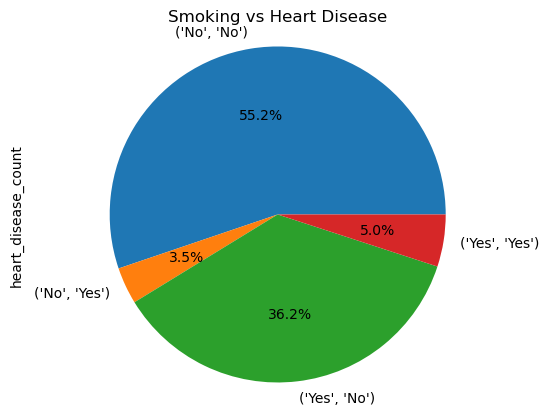

In [119]:
plt.pie(Smokers, labels=Smokers.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Smoking vs Heart Disease')
plt.ylabel('heart_disease_count')
plt.show()

##  AlcoholDrinking vs Heart Disease

In [114]:
# Rename AlcoholDrinking to "Alcohol"
Heart_Disease_df = data.rename(columns={"AlcoholDrinking": "Alcohol"})
Heart_Disease_df.head()

,HeartDisease,BMI,Smoking,Alcohol,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [115]:
# Calculate the total of Alcohol consumers and non alcohol consumers
Alcohol = pd.DataFrame(Heart_Disease_df['Alcohol']).value_counts()
Alcohol

Alcohol
No         298018
Yes         21777
Name: count, dtype: int64

In [116]:
Alcohol = Heart_Disease_df.groupby(['Alcohol', 'HeartDisease']).size()
Alcohol

Alcohol  HeartDisease
No       No              271786
         Yes              26232
Yes      No               20636
         Yes               1141
dtype: int64

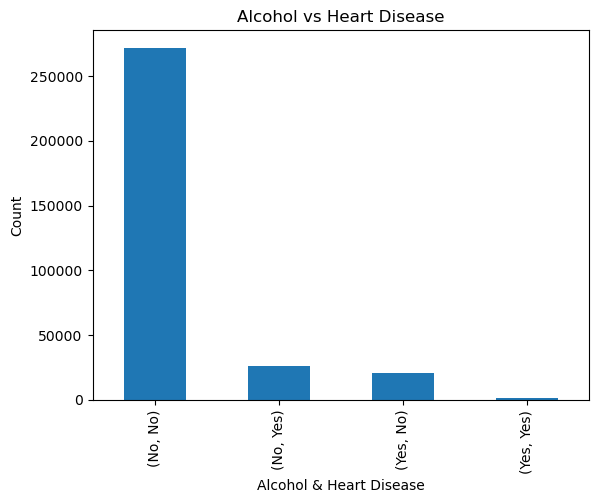

In [117]:
Alcohol.plot(kind='bar')

plt.xlabel('Alcohol & Heart Disease')
plt.ylabel('Count')
plt.title('Alcohol vs Heart Disease')

plt.show()